Задание   
Вам предложено два датасета на выбор: “german_used_cars.csv” и “salary_dataset.csv”:   
- Проведите оценку данных по столбцам, посмотрите визуально на распределение данных, определите базовые статистики, где это возможно.  
-Найдите выбросы в данных, для наглядности используйте соответствующие типы визуализаций. Попробуйте объяснить их появление в наборе.  
-Задайте 4-6 вопросов к вашим данным и постарайтесь ответить на них графически (один вопрос/гипотеза — один график).  
-Желательно, но не обязательно:*  
-Если данные содержат пропуски, заполните их и обоснуйте своё решение. Проверьте, как изменились базовые статистики до и после замены.

In [ ]:
"""Информация по набору:
(Age) Возраст: возраст лиц в наборе данных, представляющий их хронологический возраст в годах.
(Genter) Пол: гендерная идентификация лиц, указывающая их пол или гендерную идентичность.
(Education level) Уровень образования: наивысший уровень образования, полученный лицами, указывающий их образовательную квалификацию или степень.
(Jop title) Должность: род занятий или должность лиц, указывающая их профессиональную роль или положение.
(Years of experience) Опыт работы: количество лет профессионального опыта, накопленного лицами в соответствующих областях.
(Salary) Зарплата: уровень дохода или зарплата, получаемая лицами, указывающая их денежную компенсацию.
(Country) Страна: страна проживания или происхождения лиц, предоставляющая географическую информацию.
(Race) Раса: расовое происхождение или этническая принадлежность лиц, отражающая их конкретную расовую или этническую группу."""

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('/content/salary_dataset.csv')


df.head(10)

,Unnamed: 0,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Country,Race
0,0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0,UK,White
1,1,28.0,Female,Master's,Data Analyst,3.0,65000.0,USA,Hispanic
2,2,45.0,Male,PhD,Senior Manager,15.0,150000.0,Canada,White
3,3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0,USA,Hispanic
4,4,52.0,Male,Master's,Director,20.0,200000.0,USA,Asian
5,5,29.0,Male,Bachelor's,Marketing Analyst,2.0,55000.0,USA,Hispanic
6,6,42.0,Female,Master's,Product Manager,12.0,120000.0,USA,Asian
7,7,31.0,Male,Bachelor's,Sales Manager,4.0,80000.0,China,Korean
8,8,26.0,Female,Bachelor's,Marketing Coordinator,1.0,45000.0,China,Chinese
9,9,38.0,Male,PhD,Senior Scientist,10.0,110000.0,Australia,Australian


In [ ]:
"""В принципе пропусков мало, я думаю ими можно пренебречь"""
print(df.isnull().sum())

Unnamed: 0             0
Age                    2
Gender                 2
Education Level        3
Job Title              2
Years of Experience    3
Salary                 5
Country                0
Race                   0
dtype: int64


In [ ]:
"""Средний возраст работника 33 года, опыт 8 лет и ЗП 115326 $ в год, самый молодой работник это 21 год,
опыт отсутствует, ЗП 350 $ в год (как-то маловато...). Ну а самый опытный в возрасте 62 года с опытом 34 года и соответственно
он получает ЗП  250000 $ в год"""
df.describe()


,Unnamed: 0,Age,Years of Experience,Salary
count,6704.000000,6702.000000,6701.000000,6699.000000
mean,3351.500000,33.620859,8.094687,115326.964771
std,1935.422435,7.614633,6.059003,52786.183911
min,0.000000,21.000000,0.000000,350.000000
25%,1675.750000,28.000000,3.000000,70000.000000
50%,3351.500000,32.000000,7.000000,115000.000000
75%,5027.250000,38.000000,12.000000,160000.000000
max,6703.000000,62.000000,34.000000,250000.000000


In [ ]:
Q1 = df[['Age','Years of Experience','Salary']].quantile(0.25)
Q3 = df[['Age','Years of Experience','Salary']].quantile(0.75)
IQR = Q3 - Q1
IQR
lower_bound = Q1 - (1.5 * IQR)
upper_bound = Q3 + (1.5 * IQR)


print(IQR)
print(lower_bound)
print(upper_bound)

Age                       10.0
Years of Experience        9.0
Salary                 90000.0
dtype: float64
Age                       13.0
Years of Experience      -10.5
Salary                -65000.0
dtype: float64
Age                        53.0
Years of Experience        25.5
Salary                 295000.0
dtype: float64


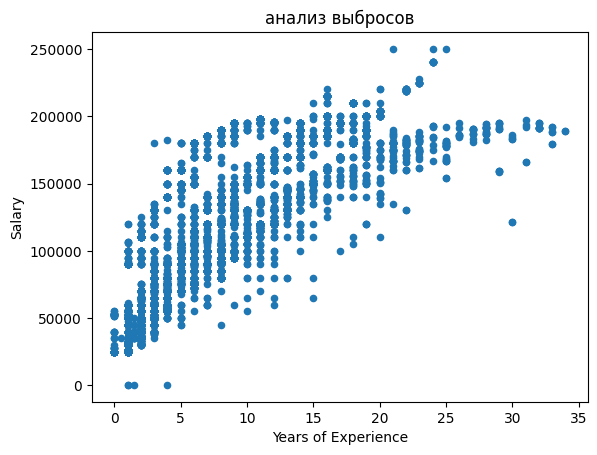

'скорее всего выбросы связаны с тем, что ЗП зависит от уровня образования, должности и опыта работы. '

In [ ]:

df.plot(kind='scatter', x='Years of Experience', y='Salary')
plt.title("анализ выбросов")
plt.show()
"""скорее всего выбросы связаны с тем, что ЗП зависит от уровня образования, должности и опыта работы. """

In [ ]:

columns = ['Gender','Education Level ','Country','Race']
for col in columns:
    print(df[col].value_counts())


Gender
Male      3674
Female    3014
Other       14
Name: count, dtype: int64
Education Level
Bachelor's Degree    2267
Master's Degree      1573
PhD                  1368
Bachelor's            756
High School           448
Master's              288
phD                     1
Name: count, dtype: int64
Country
USA          1360
China        1343
UK           1337
Australia    1336
Canada       1328
Name: count, dtype: int64
Race
White               1968
Asian               1603
Korean               457
Australian           452
Chinese              444
Black                437
African American     354
Mixed                334
Welsh                333
Hispanic             322
Name: count, dtype: int64


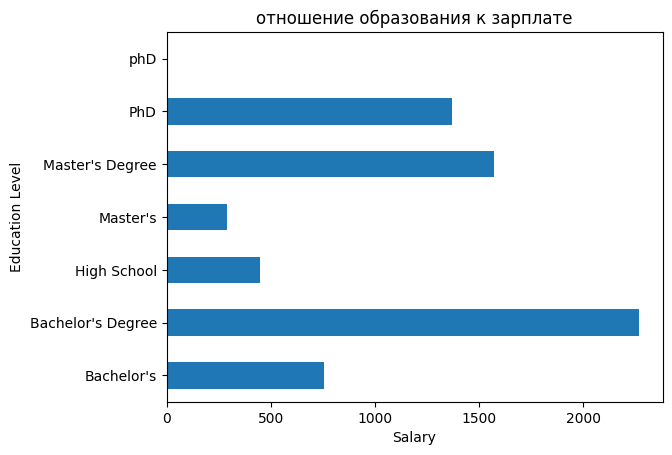

In [ ]:
"""влияет ли уровень образования на зарплату?
да, влияет."""
df.groupby('Education Level').size().plot(kind='barh')
plt.title("отношение образования к зарплате")
plt.xlabel("Salary")
plt.show()


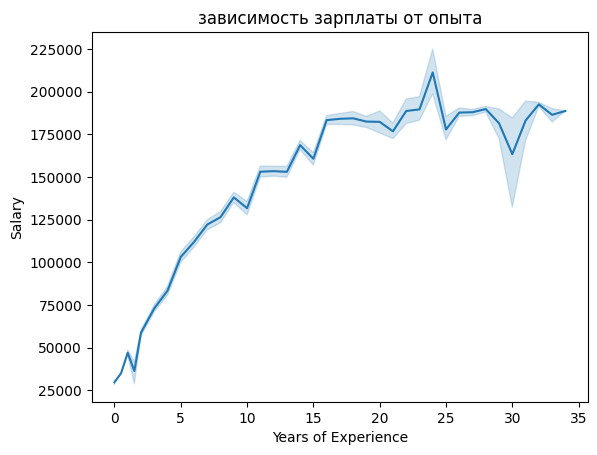

In [ ]:
"""зависит ли зарплата от трудового стажа?
да, зависит."""
sns.lineplot(data=df, x="Years of Experience", y="Salary")
plt.title("зависимость зарплаты от опыта")
plt.xlabel("Years of Experience")
plt.ylabel("Salary")
plt.show()